In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import matplotlib
matplotlib.rcParams['text.usetex'] = True

In [2]:
def getVarPlot(fin, b, numUse = None):
    
    data = pk.load(open(fin, 'rb'))['Experiments_All_Accuracy']        
    numEntries = np.size(data[0])
    if numUse is not None:
        numEntries = int(np.min([numEntries, numUse]))
    numUsefulRows = 0
    for i in range(len(data)):
        if np.size(data[i])<numEntries:break
        numUsefulRows += 1
    
    data = [x[:numEntries] for x in data]
    data = np.array(data[:numUsefulRows])
    data_mean = np.mean(data,axis=0)
    data_std = np.std(data, axis=0)
    data_min = np.min(data,axis=0)
    data_max = np.max(data,axis=0)
    data_x = np.arange(np.size(data_mean))*b
    return data_x, data_mean, data_std

# MNIST

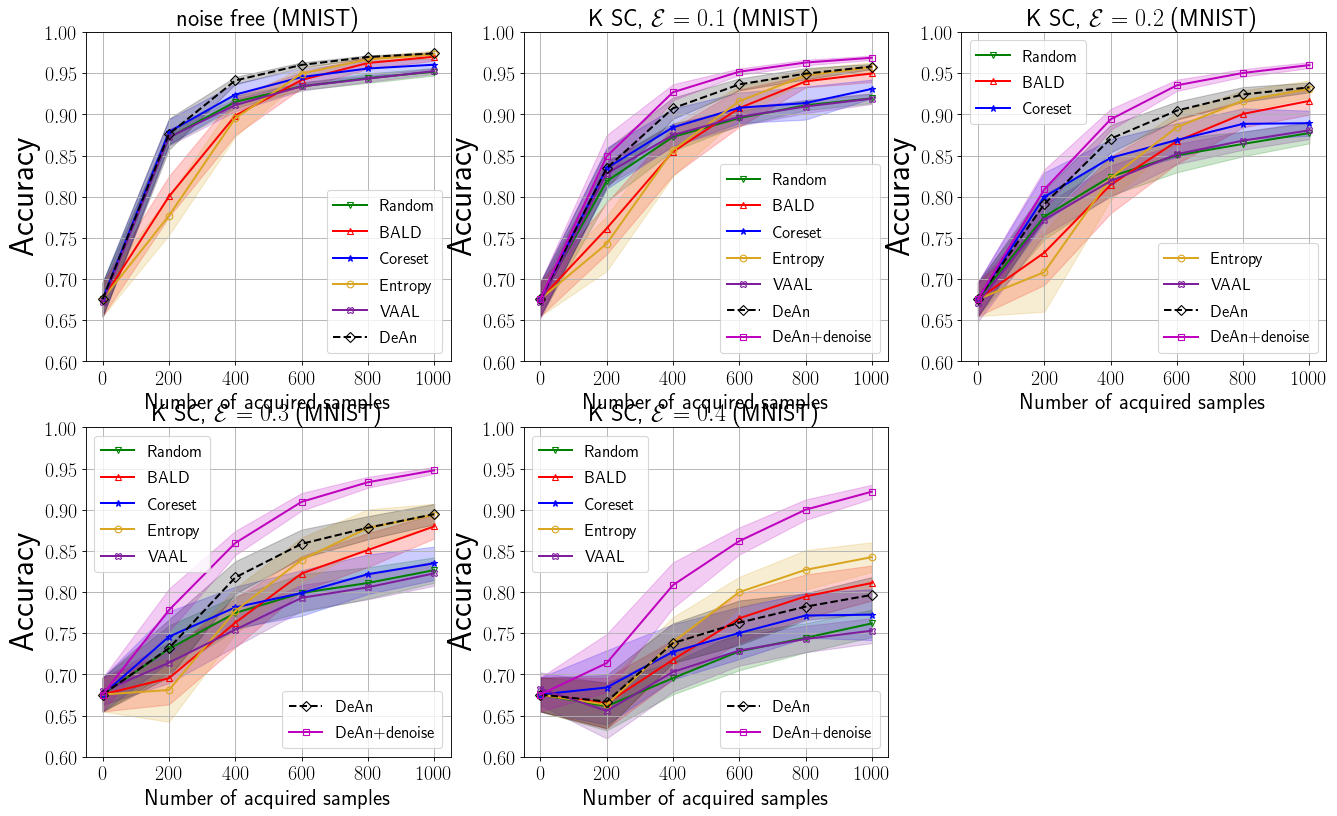

In [362]:
# init size = 40

doSaveFig = False  # False
b = 200
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'DeAn', 'DeAn+denoise']
color = ['g', 'r', 'b', 'goldenrod', 'xkcd:Purple', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'X', 'D', 's' ]
linestyle = ['solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid']

f = plt.figure(figsize=(20,12), dpi=80)
plt.rc('font', size=18)
plt.rc('legend', fontsize=15)
plt.subplot(2, 3, 1)
fin = ['Results/MNIST/AL_RND_b_200_MNIST_Experiment_1.p', 
       'Results/MNIST/AL_BALD_b_200_MNIST_Experiment_2.p',
       'Results/MNIST/AL_k-center-greedy_b_200_MNIST_Experiment_3.p', 
       'Results/MNIST/AL_maxEnt_b_200_MNIST_Experiment_4.p',
       'Results/MNIST/NeuRIPS/AL_VAAL_b_200_MNIST_Experiment_5.p',
       'Results/MNIST/AL_Cluster_b_200_MNIST_Experiment_6.p',
      ]
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.6,1])
plt.legend(legendName)
plt.title('noise free (MNIST)')
if doSaveFig:
    f.savefig('MNIST_KSC_noise_free.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 2)

fin = ['Results/MNIST/New/Jatayu/AL_RND_b_200_MNIST_Experiment_261.p', 
       'Results/MNIST/New/Jatayu/AL_BALD_b_200_MNIST_Experiment_249.p',
       'Results/MNIST/New/Jatayu/AL_k-center-greedy_b_200_MNIST_Experiment_257.p', 
       'Results/MNIST/New/Jatayu/AL_maxEnt_b_200_MNIST_Experiment_253.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_200_MNIST_Experiment_701.p',
       'Results/MNIST/New/Jatayu/AL_Cluster_b_200_MNIST_Experiment_265.p',
       'Results/MNIST/New/Jatayu/AL_Cluster-noise_b_200_MNIST_Experiment_270.p',
      ]
legendName = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.6,1])
plt.title('K SC, $\mathcal{E} = 0.1$ (MNIST)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('MNIST_KSC_0d1.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 3)
fin = ['Results/MNIST/New/Jatayu/AL_RND_b_200_MNIST_Experiment_262.p', 
       'Results/MNIST/New/Jatayu/AL_BALD_b_200_MNIST_Experiment_250.p',
       'Results/MNIST/New/Jatayu/AL_k-center-greedy_b_200_MNIST_Experiment_258.p', 
       'Results/MNIST/New/Jatayu/AL_maxEnt_b_200_MNIST_Experiment_254.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_200_MNIST_Experiment_702.p',
       'Results/MNIST/New/Jatayu/AL_Cluster_b_200_MNIST_Experiment_266.p',
       'Results/MNIST/New/Jatayu/AL_Cluster-noise_b_200_MNIST_Experiment_269.p',
      ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.6,1])
plt.title('K SC, $\mathcal{E} = 0.2$ (MNIST)')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:3], legendName[:3], loc='upper left')
l2 = plt.legend(plotHandle[3:], legendName[3:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('MNIST_KSC_0d2.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 4)
fin = ['Results/MNIST/New/Jatayu/AL_RND_b_200_MNIST_Experiment_277.p',
       'Results/MNIST/New/Jatayu/AL_BALD_b_200_MNIST_Experiment_273.p',
       'Results/MNIST/New/Jatayu/AL_k-center-greedy_b_200_MNIST_Experiment_276.p', 
       'Results/MNIST/New/Jatayu/AL_maxEnt_b_200_MNIST_Experiment_275.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_200_MNIST_Experiment_703.p',
       'Results/MNIST/New/Jatayu/AL_Cluster_b_200_MNIST_Experiment_278.p',
       'Results/MNIST/New/Jatayu/AL_Cluster-noise_b_200_MNIST_Experiment_279.p',
      ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.6,1])
plt.title('K SC, $\mathcal{E} = 0.3$ (MNIST)')
l1 = plt.legend(plotHandle[:-2], legendName[:-2], loc='upper left')
l2 = plt.legend(plotHandle[-2:], legendName[-2:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('MNIST_KSC_0d3.pdf', bbox_inches='tight')


if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 5)
fin = ['Results/MNIST/New/Jatayu/AL_RND_b_200_MNIST_Experiment_263.p', 'Results/MNIST/New/Jatayu/AL_BALD_b_200_MNIST_Experiment_251.p',
       'Results/MNIST/New/Jatayu/AL_k-center-greedy_b_200_MNIST_Experiment_259.p', 
       'Results/MNIST/New/Jatayu/AL_maxEnt_b_200_MNIST_Experiment_255.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_200_MNIST_Experiment_704.p',
       'Results/MNIST/New/Jatayu/AL_Cluster_b_200_MNIST_Experiment_267.p',
       'Results/MNIST/New/Jatayu/AL_Cluster-noise_b_200_MNIST_Experiment_272.p',
      ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.6,1])
plt.title('K SC, $\mathcal{E} = 0.4$ (MNIST)')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:-2], legendName[:-2], loc='upper left')
l2 = plt.legend(plotHandle[-2:], legendName[-2:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('MNIST_KSC_0d4.pdf', bbox_inches='tight')

plt.show()

# EMNIST, b=500

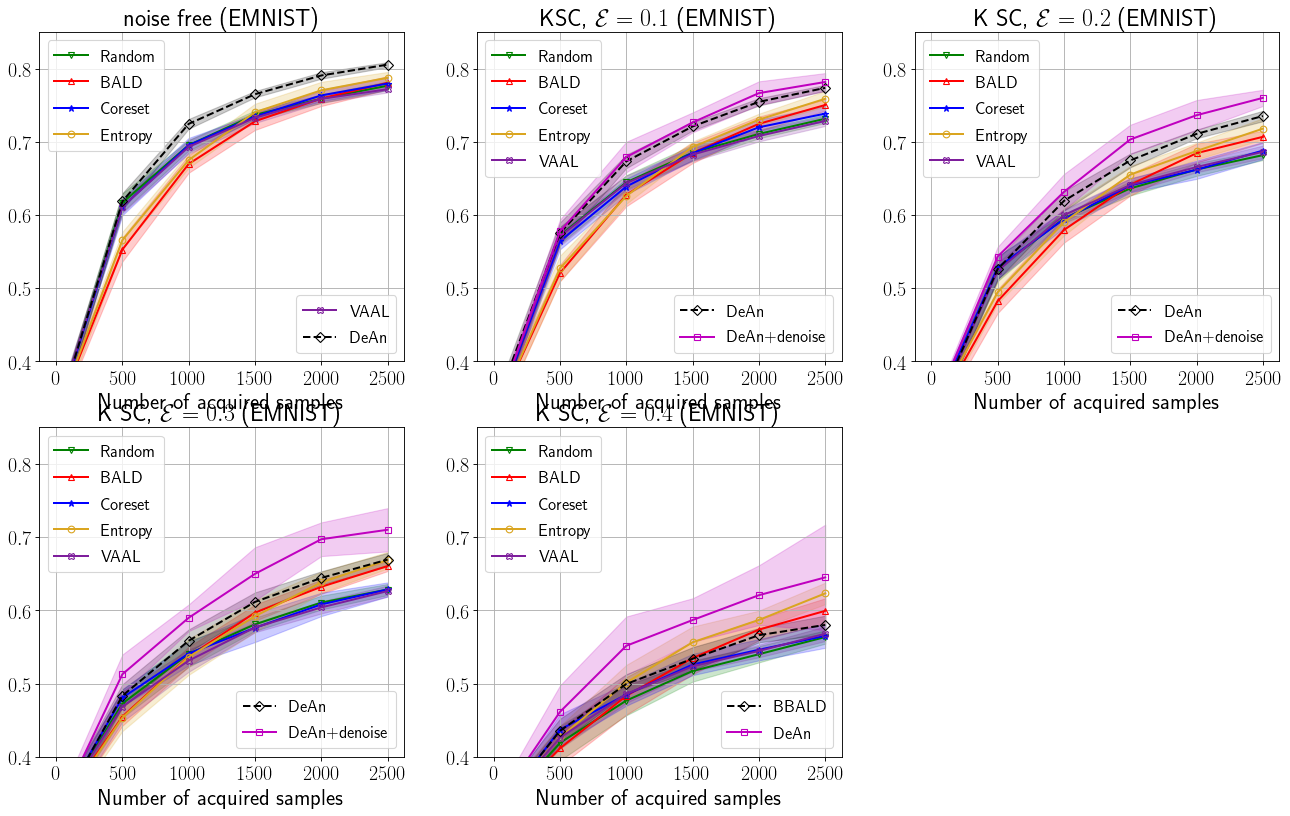

In [380]:
# init size = 40,

doSaveFig = False  # False
b = 500
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'DeAn', 'DeAn+denoise', 'test']
color = ['g', 'r', 'b', 'goldenrod', 'xkcd:Purple', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'X', 'D', 's', 's', 's']
linestyle = ['solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid', 'solid']

f = plt.figure(figsize=(20,12), dpi=80)
plt.rc('font', size=18)
plt.rc('legend', fontsize=15)
plt.subplot(2, 3, 1)
fin = ['Results/EMNIST/New/Jatayu/NeuRIPS/AL_Random_b_500_EMNIST_Experiment_2013.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_BALD_b_500_EMNIST_Experiment_2015.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_500_EMNIST_Experiment_2016.p', 
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_500_EMNIST_Experiment_2017.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_500_EMNIST_Experiment_2018.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster_b_500_EMNIST_Experiment_2039.p',
      ]
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.4,0.85])
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:4], legendName[:4], loc='upper left')
l2 = plt.legend(plotHandle[4:], legendName[4:], loc=4)
plt.gca().add_artist(l1)
plt.title('noise free (EMNIST)')
if doSaveFig:
    f.savefig('EMNIST_KSC_noise_free_b_500.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 2)

fin = ['Results/EMNIST/New/Jatayu/NeuRIPS/AL_Random_b_500_EMNIST_Experiment_2007.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_BALD_b_500_EMNIST_Experiment_2019.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_500_EMNIST_Experiment_2020.p', 
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_500_EMNIST_Experiment_2021.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_500_EMNIST_Experiment_2022.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster_b_500_EMNIST_Experiment_2036.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster-noise_b_500_EMNIST_Experiment_2040.p',
      ]
legendName = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.4,0.85])
plt.title('KSC, $\mathcal{E} = 0.1$ (EMNIST)')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:-2], legendName[:-2], loc='upper left')
l2 = plt.legend(plotHandle[-2:], legendName[-2:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('EMNIST_KSC_0d1_b_500.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 3)

fin = ['Results/EMNIST/New/Jatayu/NeuRIPS/AL_Random_b_500_EMNIST_Experiment_2041.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_BALD_b_500_EMNIST_Experiment_2042.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_500_EMNIST_Experiment_2043.p', 
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_500_EMNIST_Experiment_2044.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_500_EMNIST_Experiment_2045.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster_b_500_EMNIST_Experiment_2046.p',
        'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster-noise_b_500_EMNIST_Experiment_2048.p',
  ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.4,0.85])
plt.title('K SC, $\mathcal{E} = 0.2$ (EMNIST)')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:-2], legendName[:-2], loc='upper left')
l2 = plt.legend(plotHandle[-2:], legendName[-2:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('EMNIST_KSC_0d2_b_500.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 4)

fin = ['Results/EMNIST/New/Jatayu/NeuRIPS/AL_Random_b_500_EMNIST_Experiment_2025.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_BALD_b_500_EMNIST_Experiment_2026.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_500_EMNIST_Experiment_2027.p', 
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_500_EMNIST_Experiment_2032.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_500_EMNIST_Experiment_2029.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster_b_500_EMNIST_Experiment_2035.p',
        'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster-noise_b_500_EMNIST_Experiment_2038.p',
  ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.4,0.85])
plt.title('K SC, $\mathcal{E} = 0.3$ (EMNIST)')
l1 = plt.legend(plotHandle[:-2], legendName[:-2], loc='upper left')
l2 = plt.legend(plotHandle[-2:], legendName[-2:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('EMNIST_KSC_0d3_b_500.pdf', bbox_inches='tight')

name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'BBALD', 'DeAn', 'DeAn+denoise']
if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 5)

fin = ['Results/EMNIST/New/Jatayu/NeuRIPS/AL_Random_b_500_EMNIST_Experiment_2049.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_BALD_b_500_EMNIST_Experiment_2050.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_500_EMNIST_Experiment_2051.p', 
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_500_EMNIST_Experiment_2052.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_500_EMNIST_Experiment_2053.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster_b_500_EMNIST_Experiment_2054.p',
        'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster-noise_b_500_EMNIST_Experiment_2056.p',
  ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.4,0.85])
plt.title('K SC, $\mathcal{E} = 0.4$ (EMNIST)')
l1 = plt.legend(plotHandle[:-2], legendName[:-2], loc='upper left')
l2 = plt.legend(plotHandle[-2:], legendName[-2:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('EMNIST_KSC_0d4_b_500.pdf', bbox_inches='tight')

name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'BBALD', 'DeAn', 'DeAn+denoise']
if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)

# EMNIST, b=100

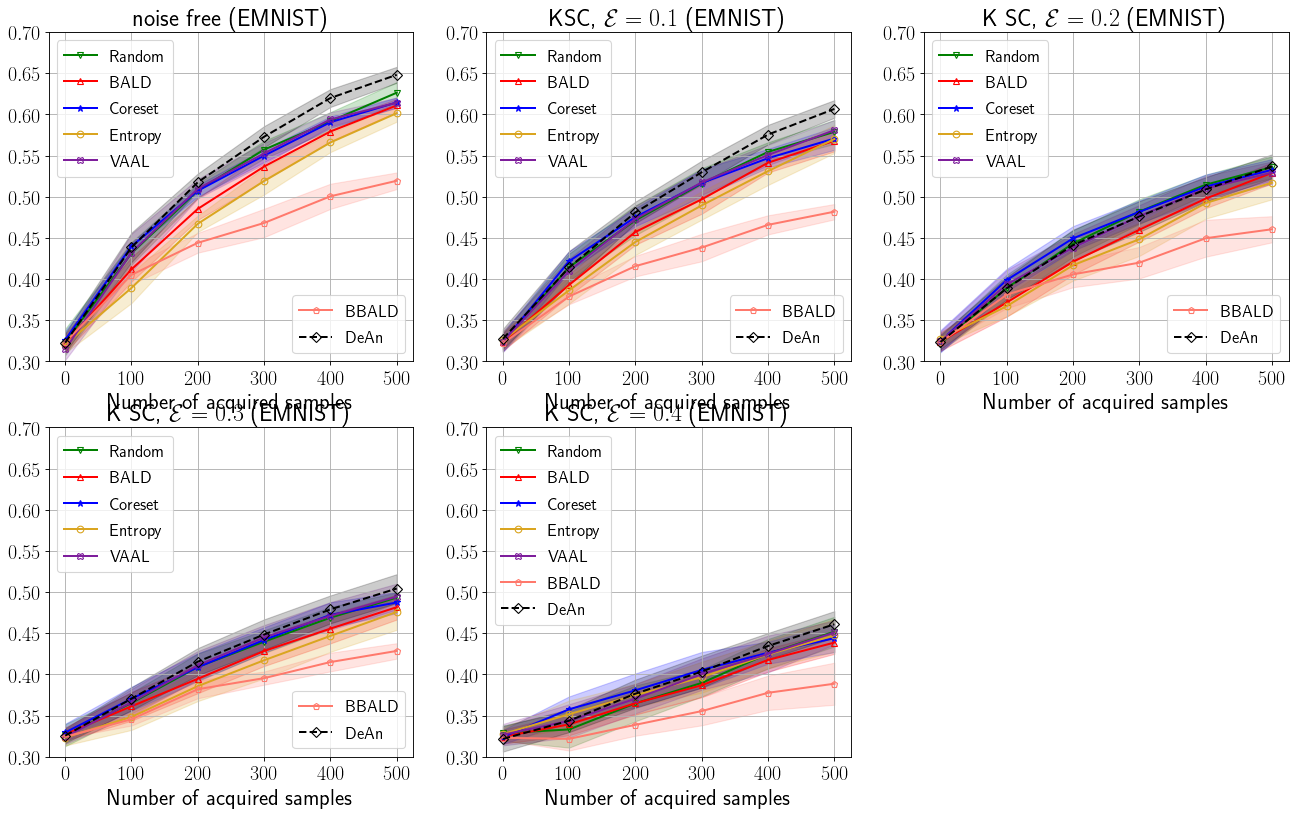

In [401]:
# init size = 40,

doSaveFig = False  # False
b = 100
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'BBALD', 'DeAn', 'DeAn+denoise']
color = ['g', 'r', 'b', 'goldenrod', 'xkcd:Purple', 'xkcd:salmon', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'X', 'p', 'D', 's' ]
linestyle = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid']

f = plt.figure(figsize=(20,12), dpi=80)
plt.rc('font', size=18)
plt.rc('legend', fontsize=15)
plt.subplot(2, 3, 1)
fin = ['Results/EMNIST/New/Jatayu/NeuRIPS/AL_Random_b_100_EMNIST_Experiment_841.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_BALD_b_100_EMNIST_Experiment_842.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_100_EMNIST_Experiment_837.p', 
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_100_EMNIST_Experiment_838.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_100_EMNIST_Experiment_839.p',
       'BatchBALD/Results/EMNIST/AL_BBALD_b_100_Exp_200.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster_b_100_EMNIST_Experiment_1000.p',
      ]
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.3,0.7])
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:-2], legendName[:-2], loc='upper left')
l2 = plt.legend(plotHandle[-2:], legendName[-2:], loc=4)
plt.gca().add_artist(l1)
plt.title('noise free (EMNIST)')
if doSaveFig:
    f.savefig('EMNIST_KSC_noise_free_b_100.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 2)

fin = ['Results/EMNIST/New/Jatayu/NeuRIPS/AL_Random_b_100_EMNIST_Experiment_847.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_BALD_b_100_EMNIST_Experiment_848.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_100_EMNIST_Experiment_849.p', 
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_100_EMNIST_Experiment_850.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_100_EMNIST_Experiment_851.p',
       'BatchBALD/Results/EMNIST/AL_BBALD_b_100_Exp_201.p',
       'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster_b_100_EMNIST_Experiment_1001.p',
      ]
legendName = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.3,0.7])
plt.title('KSC, $\mathcal{E} = 0.1$ (EMNIST)')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:-2], legendName[:-2], loc='upper left')
l2 = plt.legend(plotHandle[-2:], legendName[-2:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('EMNIST_KSC_0d1_b_100.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 3)

fin = ['Results/EMNIST/New/Jatayu/NeuRIPS/AL_Random_b_100_EMNIST_Experiment_853.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_BALD_b_100_EMNIST_Experiment_854.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_100_EMNIST_Experiment_855.p', 
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_100_EMNIST_Experiment_856.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_100_EMNIST_Experiment_857.p',
   'BatchBALD/Results/EMNIST/AL_BBALD_b_100_Exp_210.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster_b_100_EMNIST_Experiment_858.p',
  ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.3,0.7])
plt.title('K SC, $\mathcal{E} = 0.2$ (EMNIST)')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:-2], legendName[:-2], loc='upper left')
l2 = plt.legend(plotHandle[-2:], legendName[-2:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('EMNIST_KSC_0d2_b_100.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 4)

fin = ['Results/EMNIST/New/Jatayu/NeuRIPS/AL_Random_b_100_EMNIST_Experiment_859.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_BALD_b_100_EMNIST_Experiment_860.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_100_EMNIST_Experiment_861.p', 
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_100_EMNIST_Experiment_862.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_100_EMNIST_Experiment_863.p',
   'BatchBALD/Results/EMNIST/AL_BBALD_b_100_Exp_211.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster_b_100_EMNIST_Experiment_10002.p',
  ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.3,0.7])
plt.title('K SC, $\mathcal{E} = 0.3$ (EMNIST)')
l1 = plt.legend(plotHandle[:-2], legendName[:-2], loc='upper left')
l2 = plt.legend(plotHandle[-2:], legendName[-2:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('EMNIST_KSC_0d3_b_100.pdf', bbox_inches='tight')

name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'BBALD', 'DeAn', 'DeAn+denoise']
if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 5)

fin = ['Results/EMNIST/New/Jatayu/NeuRIPS/AL_Random_b_100_EMNIST_Experiment_1100.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_BALD_b_100_EMNIST_Experiment_1101.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_100_EMNIST_Experiment_1102.p', 
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_100_EMNIST_Experiment_1103.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_100_EMNIST_Experiment_1104.p',
   'BatchBALD/Results/EMNIST/AL_BBALD_b_100_Exp_212.p',
   'Results/EMNIST/New/Jatayu/NeuRIPS/AL_cluster_b_100_EMNIST_Experiment_1105.p',
  ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.3,0.7])
plt.title('K SC, $\mathcal{E} = 0.4$ (EMNIST)')
plt.legend(legendName)
# l1 = plt.legend(plotHandle[:-2], legendName[:-2], loc='upper left')
# l2 = plt.legend(plotHandle[-2:], legendName[-2:], loc=4)
# plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('EMNIST_KSC_0d4_b_100.pdf', bbox_inches='tight')

name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'BBALD', 'DeAn', 'DeAn+denoise']
if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)

# CIFAR10

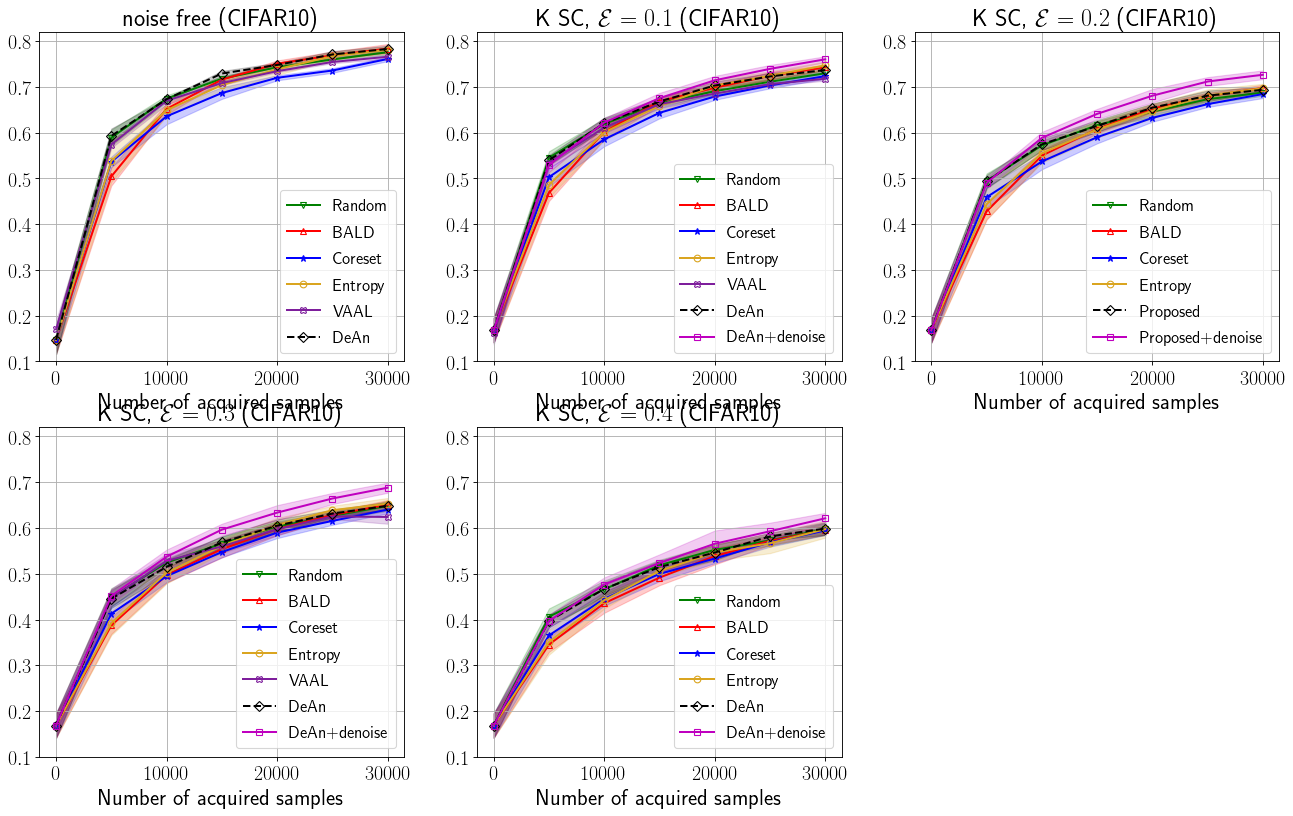

In [364]:
# init size = 50,

doSaveFig = False # False
b = 5000
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'DeAn', 'DeAn+denoise', 'gg']
color = ['g', 'r', 'b', 'goldenrod','xkcd:Purple', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'X', 'D', 's', 'P']
linestyle = ['solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid']

f = plt.figure(figsize=(20,12), dpi=80)
plt.rc('font', size=18)
plt.rc('legend', fontsize=15)
plt.subplot(2, 3, 1)
fin = ['Results/CIFAR10/New/SQHill/AL_RND_b_5000_CIFAR10_Experiment_1.p',
       'Results/CIFAR10/New/SQHill/AL_BALD_b_5000_CIFAR10_Experiment_2.p',
     'Results/CIFAR10/New/SQHill/AL_k-center-greedy_b_5000_CIFAR10_Experiment_4.p',
       'Results/CIFAR10/New/SQHill/AL_maxEnt_b_5000_CIFAR10_Experiment_30.p',
       'Results/CIFAR10/New/Jatayu/NeuRIPS/AL_VAAL_b_5000_CIFAR10_Experiment_706.p',
       'Results/CIFAR10/New/SQHill/AL_Cluster_b_5000_CIFAR10_Experiment_3.p',
        ]
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.1,0.82])
plt.legend(legendName)
plt.title('noise free (CIFAR10)')
if doSaveFig:
    f.savefig('CIFAR10_KSC_noise_free.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 2)
fin = ['Results/CIFAR10/New/SQHill/AL_RND_b_5000_CIFAR10_Experiment_9.p',
       'Results/CIFAR10/New/SQHill/AL_BALD_b_5000_CIFAR10_Experiment_13.p',
     'Results/CIFAR10/New/SQHill/AL_k-center-greedy_b_5000_CIFAR10_Experiment_10.p',
       'Results/CIFAR10/New/SQHill/AL_maxEnt_b_5000_CIFAR10_Experiment_31.p',
       'Results/CIFAR10/New/Jatayu/NeuRIPS/AL_VAAL_b_5000_CIFAR10_Experiment_707.p',
       'Results/CIFAR10/New/SQHill/AL_Cluster_b_5000_CIFAR10_Experiment_14.p',
       'Results/CIFAR10/New/SQHill/AL_Cluster-noise_b_5000_CIFAR10_Experiment_15.p',
        ]
legendName = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.1,0.82])
plt.title('K SC, $\mathcal{E} = 0.1$ (CIFAR10)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('CIFAR10_KSC_0d1.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 3)
fin = ['Results/CIFAR10/New/SQHill/AL_RND_b_5000_CIFAR10_Experiment_24.p',
       'Results/CIFAR10/New/SQHill/AL_BALD_b_5000_CIFAR10_Experiment_28.p',
     'Results/CIFAR10/New/SQHill/AL_k-center-greedy_b_5000_CIFAR10_Experiment_26.p',
       'Results/CIFAR10/New/SQHill/AL_maxEnt_b_5000_CIFAR10_Experiment_32.p',
       'Results/CIFAR10/New/SQHill/AL_Cluster_b_5000_CIFAR10_Experiment_27.p',
       'Results/CIFAR10/New/SQHill/AL_Cluster-noise_b_5000_CIFAR10_Experiment_25.p',
        ]
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'Proposed', 'Proposed+denoise', 'gg']
color = ['g', 'r', 'b', 'goldenrod', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'D', 's', 'P']
linestyle = ['solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid']
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.1,0.82])
plt.title('K SC, $\mathcal{E} = 0.2$ (CIFAR10)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('CIFAR10_KSC_0d2.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 4)
fin = ['Results/CIFAR10/New/SQHill/AL_RND_b_5000_CIFAR10_Experiment_5.p',
       'Results/CIFAR10/New/SQHill/AL_BALD_b_5000_CIFAR10_Experiment_7.p',
     'Results/CIFAR10/New/SQHill/AL_k-center-greedy_b_5000_CIFAR10_Experiment_6.p',
       'Results/CIFAR10/New/SQHill/AL_maxEnt_b_5000_CIFAR10_Experiment_33.p',
       'Results/CIFAR10/New/Jatayu/NeuRIPS/AL_VAAL_b_5000_CIFAR10_Experiment_708.p',
       'Results/CIFAR10/New/SQHill/AL_Cluster_b_5000_CIFAR10_Experiment_8.p',
       'Results/CIFAR10/New/SQHill/AL_Cluster-noise_b_5000_CIFAR10_Experiment_12.p',
        ]
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'DeAn', 'DeAn+denoise', 'gg']
color = ['g', 'r', 'b', 'goldenrod','xkcd:Purple', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'X', 'D', 's', 'P']
linestyle = ['solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid']
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.1,0.82])
plt.title('K SC, $\mathcal{E} = 0.3$ (CIFAR10)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('CIFAR10_KSC_0d3.pdf', bbox_inches='tight')


if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 5)
fin = ['Results/CIFAR10/New/SQHill/AL_RND_b_5000_CIFAR10_Experiment_16.p',
       'Results/CIFAR10/New/SQHill/AL_BALD_b_5000_CIFAR10_Experiment_22.p',
     'Results/CIFAR10/New/SQHill/AL_k-center-greedy_b_5000_CIFAR10_Experiment_18.p', 
       'Results/CIFAR10/New/SQHill/AL_maxEnt_b_5000_CIFAR10_Experiment_34.p',
       'Results/CIFAR10/New/SQHill/AL_Cluster_b_5000_CIFAR10_Experiment_19.p',
       'Results/CIFAR10/New/SQHill/AL_Cluster-noise_b_5000_CIFAR10_Experiment_17.p',
        ]
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'DeAn', 'DeAn+denoise', 'gg']
color = ['g', 'r', 'b', 'goldenrod', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'D', 's', 'P']
linestyle = ['solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid']
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.1,0.82])
plt.title('K SC, $\mathcal{E} = 0.4$ (CIFAR10)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('CIFAR10_KSC_0d4.pdf', bbox_inches='tight')

plt.show()

# SVHN

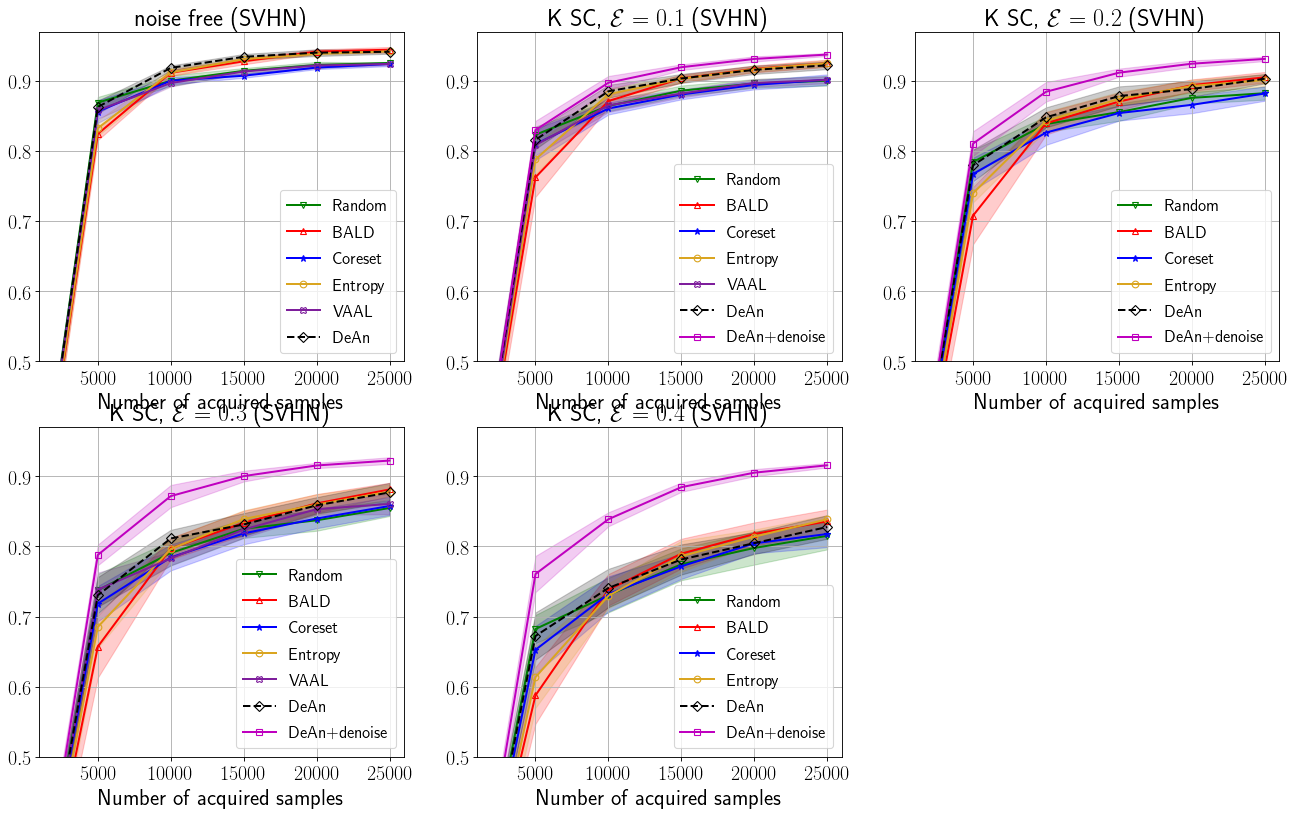

In [366]:
# init size = 50

doSaveFig = False  # False
b = 5000
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'DeAn', 'DeAn+denoise']
color = ['g', 'r', 'b', 'goldenrod', 'xkcd:Purple', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'X', 'D', 's']
linestyle = ['solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid']

f = plt.figure(figsize=(20,12), dpi=80)
plt.rc('font', size=18)
plt.rc('legend', fontsize=15)
plt.subplot(2, 3, 1)
fin = ['Results/SVHN/New/SQHill/AL_RND_b_5000_SVHN_Experiment_9.p',
       'Results/SVHN/New/SQHill/AL_BALD_b_5000_SVHN_Experiment_10.p',
       'Results/SVHN/New/SQHill/AL_k-center-greedy_b_5000_SVHN_Experiment_11.p',
       'Results/SVHN/New/SQHill/AL_maxEnt_b_5000_SVHN_Experiment_75.p',
       'Results/SVHN/New/Jatayu/NeuRIPS/AL_VAAL_b_5000_SVHN_Experiment_750.p',
       'Results/SVHN/New/SQHill/AL_Cluster_b_5000_SVHN_Experiment_12.p',
      ]
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.5,0.97])
plt.xlim([1000,26000])
plt.legend(legendName)
plt.title('noise free (SVHN)')
if doSaveFig:
    f.savefig('SVHN_KSC_noise_free.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 2)
fin = ['Results/SVHN/New/SQHill/AL_RND_b_5000_SVHN_Experiment_15.p',
       'Results/SVHN/New/SQHill/AL_BALD_b_5000_SVHN_Experiment_16.p',
       'Results/SVHN/New/SQHill/AL_k-center-greedy_b_5000_SVHN_Experiment_13.p',
       'Results/SVHN/New/SQHill/AL_maxEnt_b_5000_SVHN_Experiment_76.p',
       'Results/SVHN/New/Jatayu/NeuRIPS/AL_VAAL_b_5000_SVHN_Experiment_751.p',
       'Results/SVHN/New/SQHill/AL_Cluster_b_5000_SVHN_Experiment_14.p',
       'Results/SVHN/New/SQHill/AL_Cluster-noise_b_5000_SVHN_Experiment_17.p',
      ]
legendName = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.5,0.97])
plt.xlim([1000,26000])
plt.title('K SC, $\mathcal{E} = 0.1$ (SVHN)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('SVHN_KSC_0d1.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 3)
fin = ['Results/SVHN/New/SQHill/AL_RND_b_5000_SVHN_Experiment_18.p',
       'Results/SVHN/New/SQHill/AL_BALD_b_5000_SVHN_Experiment_19.p',
       'Results/SVHN/New/SQHill/AL_k-center-greedy_b_5000_SVHN_Experiment_20.p',
       'Results/SVHN/New/SQHill/AL_maxEnt_b_5000_SVHN_Experiment_77.p',
       'Results/SVHN/New/SQHill/AL_Cluster_b_5000_SVHN_Experiment_21.p',
       'Results/SVHN/New/SQHill/AL_Cluster-noise_b_5000_SVHN_Experiment_24.p',
      ]
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'DeAn', 'DeAn+denoise', 'gg']
color = ['g', 'r', 'b', 'goldenrod', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'D', 's', 'P']
linestyle = ['solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid']
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.5,0.97])
plt.xlim([1000,26000])
plt.title('K SC, $\mathcal{E} = 0.2$ (SVHN)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('SVHN_KSC_0d2.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 4)
fin = ['Results/SVHN/New/SQHill/AL_RND_b_5000_SVHN_Experiment_1.p',
       'Results/SVHN/New/SQHill/AL_BALD_b_5000_SVHN_Experiment_3.p',
       'Results/SVHN/New/SQHill/AL_k-center-greedy_b_5000_SVHN_Experiment_6.p',
       'Results/SVHN/New/SQHill/AL_maxEnt_b_5000_SVHN_Experiment_79.p',
       'Results/SVHN/New/Jatayu/NeuRIPS/AL_VAAL_b_5000_SVHN_Experiment_752.p',
       'Results/SVHN/New/SQHill/AL_Cluster_b_5000_SVHN_Experiment_5.p',
       'Results/SVHN/New/SQHill/AL_Cluster-noise_b_5000_SVHN_Experiment_23.p',
      ]
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'DeAn', 'DeAn+denoise', 'gg']
color = ['g', 'r', 'b', 'goldenrod','xkcd:Purple', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'X', 'D', 's', 'P']
linestyle = ['solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid']
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.5,0.97])
plt.xlim([1000,26000])
plt.title('K SC, $\mathcal{E} = 0.3$ (SVHN)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('SVHN_KSC_0d3.pdf', bbox_inches='tight')


if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 5)
fin = ['Results/SVHN/New/SQHill/AL_RND_b_5000_SVHN_Experiment_28.p', 
       'Results/SVHN/New/SQHill/AL_BALD_b_5000_SVHN_Experiment_29.p',
       'Results/SVHN/New/SQHill/AL_k-center-greedy_b_5000_SVHN_Experiment_26.p',
      'Results/SVHN/New/SQHill/AL_maxEnt_b_5000_SVHN_Experiment_78.p',
       'Results/SVHN/New/SQHill/AL_Cluster_b_5000_SVHN_Experiment_80.p',
       'Results/SVHN/New/SQHill/AL_Cluster-noise_b_5000_SVHN_Experiment_25.p',
      ]
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'DeAn', 'DeAn+denoise', 'gg']
color = ['g', 'r', 'b', 'goldenrod', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'D', 's', 'P']
linestyle = ['solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid']
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.5,0.97])
plt.xlim([1000,26000])
plt.title('K SC, $\mathcal{E} = 0.4$ (SVHN)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('SVHN_KSC_0d4.pdf', bbox_inches='tight')

plt.show()

# CIFAR100

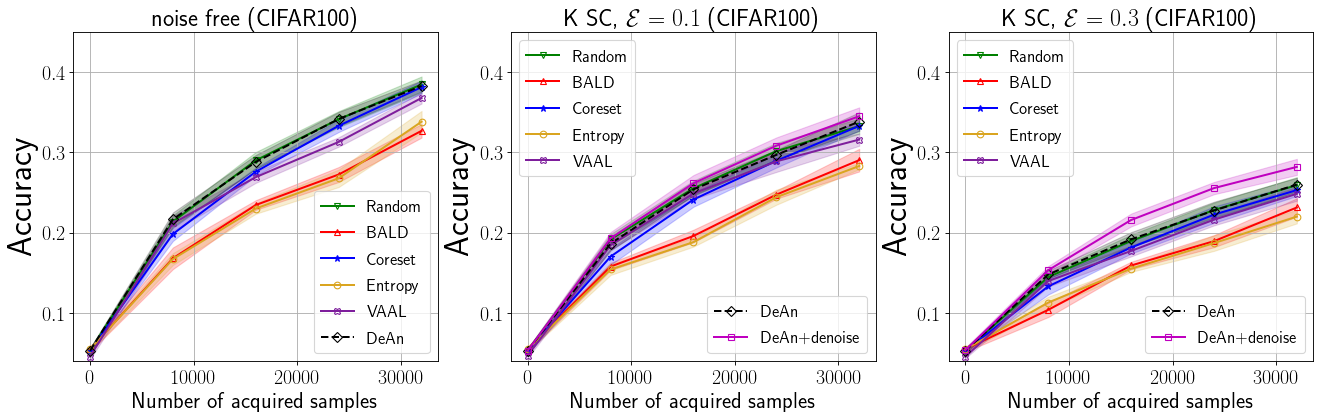

In [5]:
# init size = 50, pyTorch on Jatayu

doSaveFig = False  # False
b = 8000
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'DeAn', 'DeAn+denoise']
# color = ['g', 'r', 'b', 'm', 'k', 'goldenrod', 'xkcd:Purple', 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
color = ['g', 'r', 'b', 'goldenrod','xkcd:Purple', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'X', 'D', 's']
linestyle = ['solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid']

f = plt.figure(figsize=(20,12), dpi=80)
plt.rc('font', size=18)
plt.rc('legend', fontsize=15)
plt.subplot(2, 3, 1)
fin = ['Results/CIFAR100/New/SQHill/AL_RND_b_8000_CIFAR100_Experiment_1.p',
       'Results/CIFAR100/New/Jatayu/NeuRIPS/AL_BALD_b_8000_CIFAR100_Experiment_1701.p',
     'Results/CIFAR100/New/SQHill/AL_k-center-greedy_b_8000_CIFAR100_Experiment_3.p',
       'Results/CIFAR100/New/Jatayu/NeuRIPS/AL_maxEnt_b_8000_CIFAR100_Experiment_1703.p',
       'Results/CIFAR100/New/Jatayu/NeuRIPS/AL_VAAL_b_8000_CIFAR100_Experiment_708.p',
       'Results/CIFAR100/New/SQHill/AL_Cluster_b_8000_CIFAR100_Experiment_5.p',
        ]
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.04,0.45])
plt.legend(legendName)
plt.title('noise free (CIFAR100)')
if doSaveFig:
    f.savefig('CIFAR100_KSC_noise_free.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 2)
fin = ['Results/CIFAR100/New/SQHill/AL_RND_b_8000_CIFAR100_Experiment_6.p',
       'Results/CIFAR100/New/Jatayu/NeuRIPS/AL_BALD_b_8000_CIFAR100_Experiment_1801.p',
     'Results/CIFAR100/New/SQHill/AL_k-center-greedy_b_8000_CIFAR100_Experiment_8.p',
       'Results/CIFAR100/New/Jatayu/NeuRIPS/AL_maxEnt_b_8000_CIFAR100_Experiment_1803.p',
       'Results/CIFAR100/New/Jatayu/NeuRIPS/AL_VAAL_b_8000_CIFAR100_Experiment_709.p',
       'Results/CIFAR100/New/SQHillAL_Cluster_b_8000_CIFAR100_Experiment_10.p',
       'Results/CIFAR100/New/SQHill/AL_Cluster-noise_b_8000_CIFAR100_Experiment_11.p',
        ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.04,0.45])
plt.title('K SC, $\mathcal{E} = 0.1$ (CIFAR100)')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:-2], legendName[:-2], loc='upper left')
l2 = plt.legend(plotHandle[-2:], legendName[-2:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('CIFAR100_KSC_0d1.pdf', bbox_inches='tight')
    
if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 3)


fin = ['Results/CIFAR100/New/SQHill/rebuttal/AL_RND_b_8000_CIFAR100_Experiment_12.p',
      'Results/CIFAR100/New/Jatayu/NeuRIPS/AL_BALD_b_8000_CIFAR100_Experiment_2001.p',
     'Results/CIFAR100/New/SQHill/rebuttal/AL_k-center-greedy_b_8000_CIFAR100_Experiment_14.p',
       'Results/CIFAR100/New/Jatayu/NeuRIPS/AL_maxEnt_b_8000_CIFAR100_Experiment_2003.p',
       'Results/CIFAR100/New/Jatayu/NeuRIPS/AL_VAAL_b_8000_CIFAR100_Experiment_710.p',
       'Results/CIFAR100/New/SQHill/rebuttal/AL_Cluster_b_8000_CIFAR100_Experiment_16.p',
       'Results/CIFAR100/New/SQHill/rebuttal/AL_Cluster-noise_b_8000_CIFAR100_Experiment_17.p',
        ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.04,0.45])
plt.title('K SC, $\mathcal{E} = 0.3$ (CIFAR100)')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:-2], legendName[:-2], loc='upper left')
l2 = plt.legend(plotHandle[-2:], legendName[-2:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('CIFAR100_KSC_0d3.pdf', bbox_inches='tight')

plt.show()

In [45]:
def getUncertaintyPlot(fin, b, numUse = None):
    
    data = pk.load(open(fin, 'rb'))['Experiments_All_mvRatio']        
    numEntries = np.size(data[0])
    if numUse is not None:
        numEntries = int(np.min([numEntries, numUse]))
    numUsefulRows = 0
    for i in range(len(data)):
        if np.size(data[i])<numEntries:break
        numUsefulRows += 1
    
    data = [x[:numEntries] for x in data]
    data = np.array(data[:numUsefulRows])

    data_mean = np.mean(data,axis=0)
    data_std = np.std(data, axis=0)
    data_min = np.min(data,axis=0)
    data_max = np.max(data,axis=0)
    data_x = np.arange(np.size(data_mean))*b
    
    return data_x, data_mean, data_std
    
#     return data_x, data_mean, data_min, data_max 

# MNIST

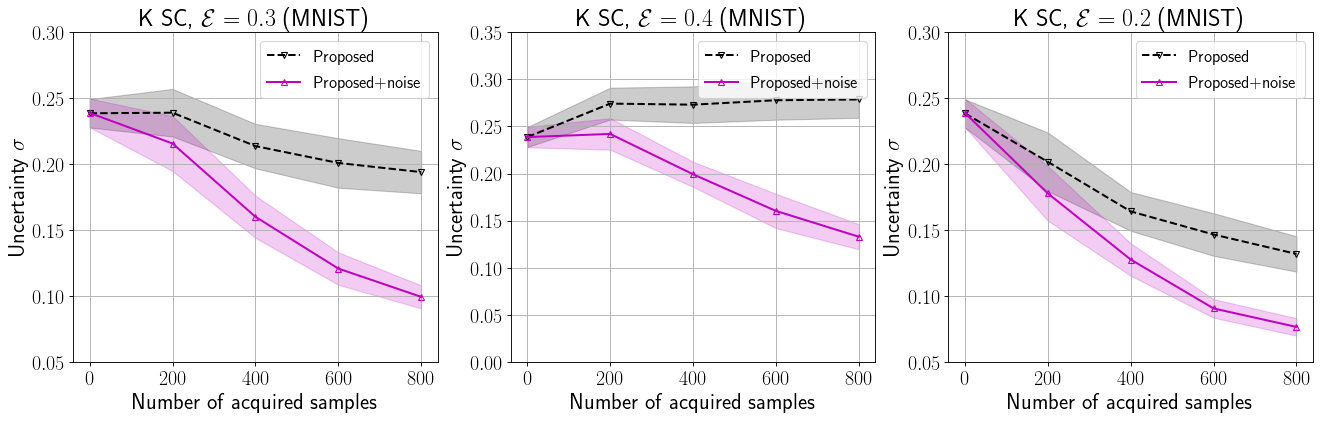

In [46]:
# init size = 40, pyTorch on Jatayu

doSaveFig = False  # False
b = 200
legendName = []
# name = ['Proposed', f"Proposed+noise \n($\mathcal{E}=0.3$)", 'Proposed ($\mathcal{E}=0$)']
name = ['Proposed', 'Proposed+noise', 'gg']
# color = ['g', 'r', 'b', 'm', 'k', 'goldenrod', 'xkcd:Purple', 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
color = ['k', 'm', 'darkred', 'r', 'b', 'goldenrod' , 'xkcd:Purple', 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
colorPatch = ['k', 'm', 'Gray', 'r', 'b', 'goldenrod' , 'xkcd:Purple', 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'D', 's']
linestyle = ['dashed', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid']

f = plt.figure(figsize=(20,12), dpi=80)
plt.rc('font', size=18)
plt.rc('legend', fontsize=15)
plt.subplot(2, 3, 1)
fin = ['Results/MNIST/New/Jatayu/AL_Cluster_b_200_MNIST_Experiment_319.p',
       'Results/MNIST/New/Jatayu/AL_Cluster-noise_b_200_MNIST_Experiment_323.p',
#        'Results/MNIST/New/Jatayu/AL_Cluster_b_200_MNIST_Experiment_325.p',
      ]
for i, file in enumerate(fin):
    x, y_m, y_s = getUncertaintyPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=colorPatch[i], alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Uncertainty $\sigma$', fontsize=20)
plt.ylim([0.05,0.3])
plt.legend(legendName)
plt.title('K SC, $\mathcal{E} = 0.3$ (MNIST)')
if doSaveFig:
    f.savefig('MNIST_uncertainty_KSC_0d3.pdf', bbox_inches='tight')
    
if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 2)
fin = ['Results/MNIST/New/Jatayu/AL_Cluster_b_200_MNIST_Experiment_320.p',
       'Results/MNIST/New/Jatayu/AL_Cluster-noise_b_200_MNIST_Experiment_322.p',
      ]
legendName = []
for i, file in enumerate(fin):
    x, y_m, y_s = getUncertaintyPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Uncertainty $\sigma$', fontsize=20)
plt.ylim([0,0.35])
plt.title('K SC, $\mathcal{E} = 0.4$ (MNIST)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('MNIST_uncertainty_KSC_0d4.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 3)
fin = ['Results/MNIST/New/Jatayu/AL_Cluster_b_200_MNIST_Experiment_321.p',
       'Results/MNIST/New/Jatayu/AL_Cluster-noise_b_200_MNIST_Experiment_324.p',
      ]
legendName = []
for i, file in enumerate(fin):
    x, y_m, y_s = getUncertaintyPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Uncertainty $\sigma$', fontsize=20)
plt.ylim([0.05,0.3])
plt.title('K SC, $\mathcal{E} = 0.2$ (MNIST)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('MNIST_uncertainty_KSC_0d2.pdf', bbox_inches='tight')

# SVHN

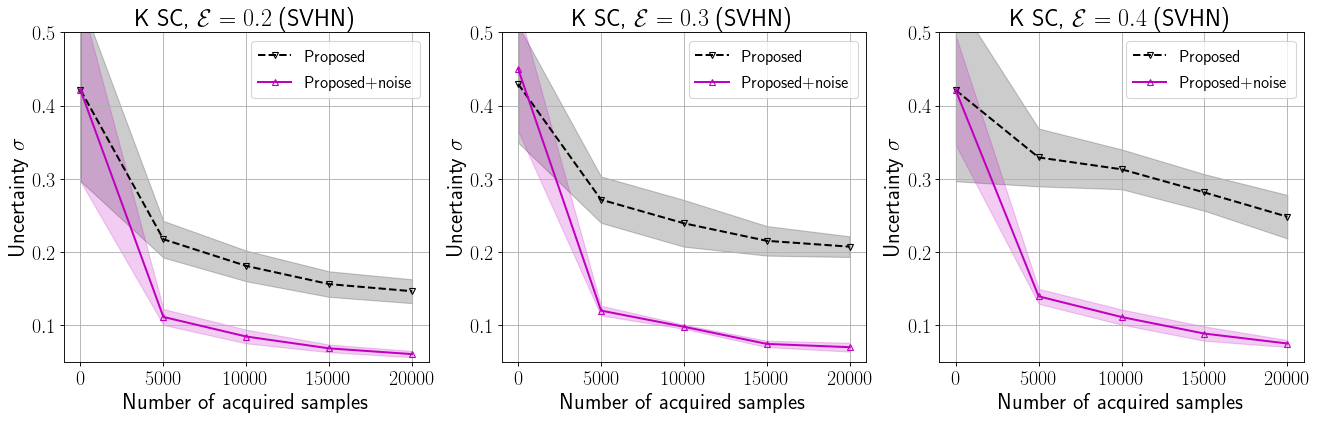

In [47]:
# init size = 40, pyTorch on Jatayu

doSaveFig = False  # False
b = 5000
legendName = []
name = ['Proposed', 'Proposed+noise']
# color = ['g', 'r', 'b', 'm', 'k', 'goldenrod', 'xkcd:Purple', 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
color = ['k', 'm', 'g', 'r', 'b', 'goldenrod' , 'xkcd:Purple', 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
marker = ['v', '^', '*', 'o', 'D', 's']
linestyle = ['dashed', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid']

f = plt.figure(figsize=(20,12), dpi=80)
plt.rc('font', size=18)
plt.rc('legend', fontsize=15)
plt.subplot(2, 3, 1)
fin = ['Results/SVHN/New/SQHill/AL_Cluster_b_5000_SVHN_Experiment_21.p',
       'Results/SVHN/New/SQHill/AL_Cluster-noise_b_5000_SVHN_Experiment_24.p',
      ]
for i, file in enumerate(fin):
    x, y_m, y_s = getUncertaintyPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Uncertainty $\sigma$', fontsize=20)
plt.ylim([0.05,0.5])
plt.legend(legendName)
plt.title('K SC, $\mathcal{E} = 0.2$ (SVHN)')
if doSaveFig:
    f.savefig('SVHN_uncertainty_KSC_0d2.pdf', bbox_inches='tight')
    
if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 2)
fin = ['Results/SVHN/New/SQHill/AL_Cluster_b_5000_SVHN_Experiment_81.p',
       'Results/SVHN/New/SQHill/AL_Cluster-noise_b_5000_SVHN_Experiment_82.p',
      ]
legendName = []
for i, file in enumerate(fin):
    x, y_m, y_s = getUncertaintyPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Uncertainty $\sigma$', fontsize=20)
plt.ylim([0.05,0.5])
plt.title('K SC, $\mathcal{E} = 0.3$ (SVHN)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('SVHN_uncertainty_KSC_0d3.pdf', bbox_inches='tight')
    
    
if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 3)
fin = ['Results/SVHN/New/SQHill/AL_Cluster_b_5000_SVHN_Experiment_32.p',
       'Results/SVHN/New/SQHill/AL_Cluster-noise_b_5000_SVHN_Experiment_25.p',
      ]
legendName = []
for i, file in enumerate(fin):
    x, y_m, y_s = getUncertaintyPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Uncertainty $\sigma$', fontsize=20)
plt.ylim([0.05,0.5])
plt.title('K SC, $\mathcal{E} = 0.4$ (SVHN)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('SVHN_uncertainty_KSC_0d4.pdf', bbox_inches='tight')